In [1]:
# Import necessary libraries
from fastai.vision.all import *
from duckduckgo_search import DDGS
from fastdownload import download_url
import time

# 1. Define the search function
# This function searches for images and returns their URLs
def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')


In [2]:



# 2. Setup folders and classes
searches = ['wolf', 'dog']
path = Path('wolf_or_dog')

# 3. Main Loop: Search and Download
for o in searches:
    dest = (path/o)
    # Create directory if it doesn't exist
    dest.mkdir(exist_ok=True, parents=True)
    
    try:
        # Search for images
        urls = search_images(f'{o} photo', max_images=25)
        
        # Download images to the destination folder
        download_images(dest, urls=urls)
        print(f"✅ Success: Downloaded images for {o}")
        
    except Exception as e:
        print(f"❌ Error searching for {o}: {e}")
        
    # Safety pause (Just to be polite to the server)
    time.sleep(5)

# 4. Cleanup: Remove corrupted images
# This removes images that didn't download correctly
print("Checking for corrupted files...")
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Removed {len(failed)} corrupted images.")

# 5. Final Report
print("-" * 30)
print(f"🐺 Wolves: {len(get_image_files(path/'wolf'))}")
print(f"🐕 Dogs:   {len(get_image_files(path/'dog'))}")

Searching for 'wolf photo'...


C:\Users\Ahmed Taha\AppData\Local\Temp\ipykernel_11180\3897788456.py:11: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(term, max_results=max_images)).itemgot('image')


✅ Success: Downloaded images for wolf
Searching for 'dog photo'...


C:\Users\Ahmed Taha\AppData\Local\Temp\ipykernel_11180\3897788456.py:11: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  return L(DDGS().images(term, max_results=max_images)).itemgot('image')


❌ Error searching for dog: https://duckduckgo.com/i.js?o=json&q=dog+photo&l=us-en&vqd=4-184055879867537225467703129282536669813&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit
Checking for corrupted files...
Removed 0 corrupted images.
------------------------------
🐺 Wolves: 71
🐕 Dogs:   50


In [3]:
import time
from fastai.vision.all import *
from duckduckgo_search import DDGS
from fastdownload import download_url

print("⏳ Waiting 30 seconds for the server to cool down... (Time for a sip of water 🥤)")
time.sleep(30)

# 1. Setup for Dogs only
term = 'cute dog photo' # غيرنا كلمة البحث عشان نخدع السيرفر
dest = Path('wolf_or_dog')/'dog'
dest.mkdir(exist_ok=True, parents=True)

try:
    print(f"🔎 Searching for: {term}")
    # بنحاول نجيب 50 صورة عشان نعادل الذئاب
    urls = L(DDGS().images(term, max_results=50)).itemgot('image')
    
    print(f"⬇️ Downloading {len(urls)} images...")
    download_images(dest, urls=urls)
    
    # تنظيف الصور التالفة
    failed = verify_images(get_image_files(dest))
    failed.map(Path.unlink)
    print(f"✅ Fixed! Dogs collected: {len(get_image_files(dest))}")

except Exception as e:
    print(f"❌ Error again: {e}")

⏳ Waiting 30 seconds for the server to cool down... (Time for a sip of water 🥤)
🔎 Searching for: cute dog photo


C:\Users\Ahmed Taha\AppData\Local\Temp\ipykernel_11180\1607747258.py:17: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  urls = L(DDGS().images(term, max_results=50)).itemgot('image')


❌ Error again: https://duckduckgo.com/i.js?o=json&q=cute+dog+photo&l=us-en&vqd=4-24752564724184162944962948241813776975&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit


## DataBlock

c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadm

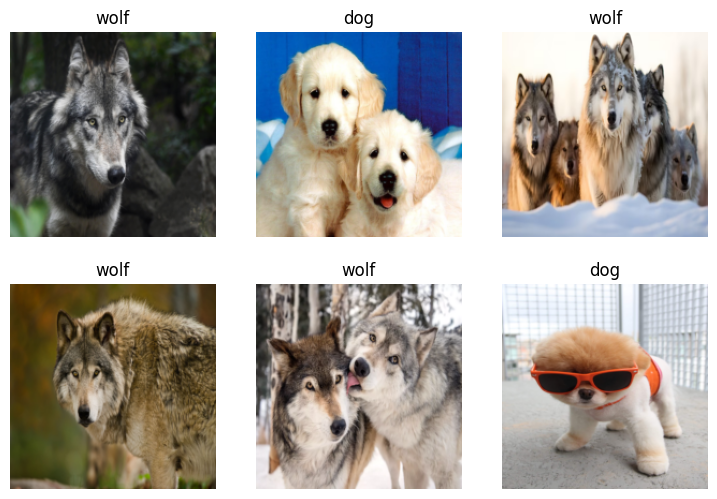

In [4]:
# 1. تعريف "قالب" البيانات (The Blueprint)
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # (المدخل: صورة, المخرج: تصنيف)
    get_items=get_image_files,            # كيف نجد الملفات؟ هات كل ملفات الصور
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # قسّم البيانات: 20% للامتحان، 80% للمذاكرة
    get_y=parent_label,                   # كيف نعرف النوع؟ من اسم الفولدر (wolf/dog)
    item_tfms=[Resize(192, method='squish')] # وحد أحجام الصور كلها لـ 192 بكسل
)

# 2. تحميل البيانات فعلياً
# path here points to the main folder 'wolf_or_dog'
dls = dblock.dataloaders(Path('wolf_or_dog'))

# 3. عرض عينة عشان نتأكد إن الكمبيوتر شايف صح
dls.show_batch(max_n=6)

## vesion learning 

In [8]:
# 1. بناء المتعلم (The Learner)
# بنستخدم موديل resnet18، ومقياس النجاح هو نسبة الخطأ (error_rate)
learn = vision_learner(dls, resnet18, metrics=error_rate)

# 2. بدء التدريب (Fine-Tuning)
# الرقم 3 يعني الموديل هيذاكر الصور دي 3 مرات (Epochs)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.303145,6.899461,0.541667,00:21


c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.278745,4.711942,0.541667,00:23
1,1.217324,2.250185,0.541667,00:23
2,0.867962,0.765269,0.333333,00:20
3,0.665739,0.273260,0.083333,00:21
4,0.530968,0.135910,0.083333,00:22


c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-phase1\venv\lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Ahmed Taha\Desktop\New folder\Machine learning\ml-roadmap-p

## testing with Huskey dogs

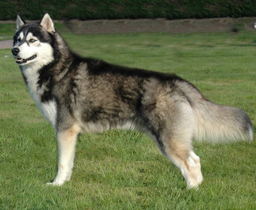

Prediction: This is a dog.
Probability it's a wolf: 0.4453
Probability it's a dog:  0.5547


In [9]:
from fastdownload import download_url
from fastai.vision.all import *

# 1. Define a direct URL for a Husky image
# We use a direct link to avoid DuckDuckGo Rate Limits
husky_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Black-Magic-Big-Boy.jpg/640px-Black-Magic-Big-Boy.jpg'
dest = 'test_image.jpg'

# 2. Download the image directly
download_url(husky_url, dest, show_progress=False)

# 3. Display the image
im = Image.open(dest)
display(im.to_thumb(256,256))

# 4. Predict
is_wolf,_,probs = learn.predict(im)

# 5. Print results
print(f"Prediction: This is a {is_wolf}.")
print(f"Probability it's a wolf: {probs[1]:.4f}")
print(f"Probability it's a dog:  {probs[0]:.4f}")

## random test

In [10]:
import random

# 1. Get all image files from our folder
all_files = get_image_files(path)

# 2. Pick 5 random images to test
random_files = random.sample(list(all_files), 5)

print("🔎 Random Test Results:\n" + "-"*30)

for img_path in random_files:
    # Predict directly
    prediction, _, probs = learn.predict(img_path)
    
    # Show output cleanly
    print(f"File: {img_path.name}")
    print(f"Prediction: {prediction.upper()}")
    # probs[0] is dog, probs[1] is wolf (usually alphabetical)
    print(f"Confidence: {max(probs):.4f}") 
    print("-" * 20)

🔎 Random Test Results:
------------------------------


File: d92efc5a-485c-447c-81fe-92d30892c7c1.jpg
Prediction: DOG
Confidence: 1.0000
--------------------


File: d7531c07-74bb-489a-9a61-2ea654fe515b.jpg
Prediction: DOG
Confidence: 1.0000
--------------------


File: 18f4e265-60b7-4773-8200-6e3d219c607f.jpg
Prediction: WOLF
Confidence: 0.6616
--------------------


File: 45619ea8-16db-497b-8114-8ebedc29652c.jpg
Prediction: WOLF
Confidence: 0.8164
--------------------


File: 4e76c135-f1ef-4022-bf2d-3f517558ff2a.jpg
Prediction: DOG
Confidence: 1.0000
--------------------
